In [46]:
import numpy as np
import pandas as pd
import scipy.io
from scipy import signal
from scipy import interpolate
from scipy import hanning, hamming, histogram, log10
import matplotlib.pyplot as plt
import matplotlib.patches as patch
from matplotlib.patches import Rectangle
import seaborn as sns
import math
import pywt
from swan import pycwt
from pathlib import Path

mat = scipy.io.loadmat('11.mat')
#root = Path(r"C:\Users\Hokud\OneDrive\ドキュメント\Python Scripts\20221022\5_fig\16")

def lowpass(time, samplerate, fp, fs, gpass, gstop):
    fn = samplerate / 2                              # ナイキスト周波数
    wp = fp / fn                                     # ナイキスト周波数で通過域端周波数を正規化
    ws = fs / fn                                     # ナイキスト周波数で阻止域端周波数を正規化
    N, Wn = signal.buttord(wp, ws, gpass, gstop)     # オーダーとバターワースの正規化周波数を計算
    b, a = signal.butter(N, Wn, "low")               # フィルタ伝達関数の分子と分母を計算
    y = signal.filtfilt(b, a, time)                  # 信号に対してフィルタをかける
    return y 

In [47]:
len(mat['EVT01'])

300

In [48]:
#パラメータ変更
root = Path(r"C:\Users\Hokud\OneDrive\ドキュメント\Python Scripts\20221219\11_0Vpp\test2")

fp = 50                                              # 通過域端周波数[Hz]
fs = 100                                             # 阻止域端周波数[Hz]
gpass = 3                                            # 通過域端最大損失[dB]
gstop = 20                                           # 阻止域端最小損失[dB]

fs1 = samplerate = 40000
base_left = -0.2
base_right = 0
analy_lenbase = 8000
time_base = np.arange(base_left,base_right,1/fs1)
cut_left = -0.2
cut_right = 0.7
analy_len = 36000
time = np.arange(cut_left,cut_right,1/fs1)
stimuli = 0                                          # 刺激の種類変更（0～4：Click, 2, 4, 8, 16）

WB = 'WB'
Ch = 'Ch'
name = 'ampsum_leave'
plt.rcParams["font.size"] = 14

#------------------------------------------------------------------------------------------------------------------
lag_base = mat['WB03_ts']
lagsample_base = int(lag_base * fs1)

sttime_base = mat['EVT01'][stimuli::1] + base_left 
lists_st_base = [] 
for sm in sttime_base:
    stsample_base = int(sm * fs1 - lagsample_base)
    lists_st_base.append(stsample_base) 

edtime_base = mat['EVT01'][stimuli::1] + base_right 
lists_ed_base = []
for sm2 in edtime_base:
    edsample_base = int(sm2 * fs1 - lagsample_base)
    lists_ed_base.append(edsample_base)

amp_sum_base = []
amp_del_base = [] #数が合わない用

ampsum_baseleave1 = [] #残す用
ampsum_baseleave2 = []
ampsum_baseleave3 = []
ampsum_baseleave4 = []
ampsum_baseleave5 = []
ampsum_baseleave6 = []
ampsum_baseleave7 = []
ampsum_baseleave8 = []
ampsum_baseleave9 = []
ampsum_baseleave10 = []
ampsum_baseleave11 = []
ampsum_baseleave12 = []
ampsum_baseleave13 = []
ampsum_baseleave14 = []
ampsum_baseleave15 = []
ampsum_baseleave16 = []


for No_base in range(1, 17):
   for i_base in range(len(lists_st_base)):
      ss_base = lists_st_base[i_base]
      ed_base = lists_ed_base[i_base]
      amp_base = [np.concatenate(mat[f'{WB}{No_base:02}'][ss_base:ed_base])]
      data_lofilt = lowpass(amp_base, samplerate, fp, fs, gpass, gstop)

      if len(data_lofilt[0])==analy_lenbase:
         A_base = [data_lofilt.T]
      elif len(data_lofilt[0])==analy_lenbase-1:
         data_lofilt = np.append(data_lofilt, 0)
         data_lofilt = data_lofilt.reshape(1,analy_lenbase)
         A_base = [data_lofilt.T]
      elif len(data_lofilt[0])==analy_lenbase+1:
         data_lofilt = np.delete(data_lofilt, -1)
         data_lofilt = data_lofilt.reshape(1,analy_lenbase)
         A_base = [data_lofilt.T]

      #A_base = [data_lofilt.T]
      if len(A_base[0])==analy_lenbase: #8000:
         amp_sum_base += A_base
      else:
         amp_del_base += A_base
      
   ave_base = np.mean(amp_sum_base,axis=0)
   base = [np.mean(ave_base)]
   globals()['ampsum_baseleave%s'%No_base].extend(base)
   print(base)
   amp_sum_base.clear()

[0.020015777477532196]
[0.021594460958043633]
[0.011287429781976634]
[0.014069767889860496]
[0.01605003730109538]
[0.01722045291370294]
[0.013676277639431841]
[0.023082886087398863]
[0.02559180887256457]
[0.012239434593081444]
[0.014773972103782992]
[0.01891747544473519]
[0.015264685758813385]
[0.021516275189309042]
[0.021696133613596933]
[0.012851598735236948]


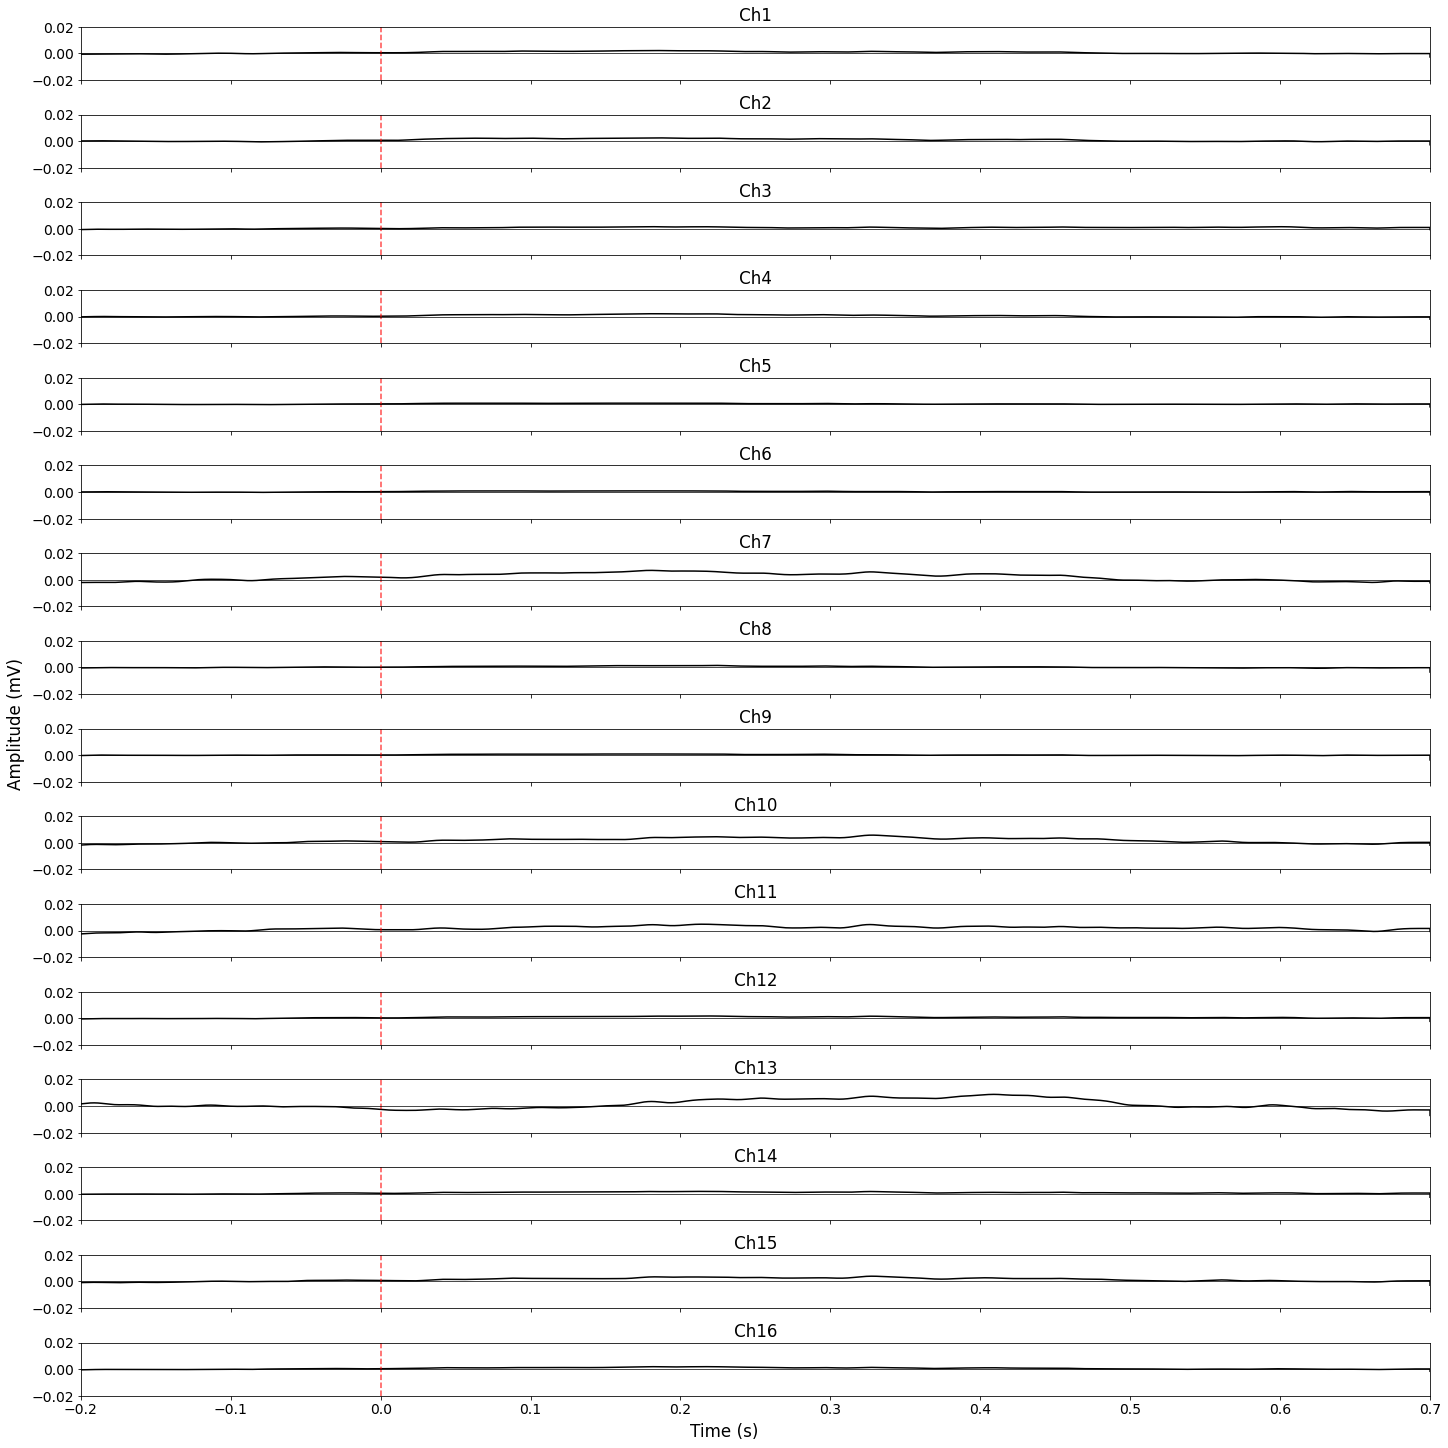

In [49]:
#刺激選択，加算平均（16ch）---------------------------------------------------------------------------------------------
lag = mat['WB03_ts']
lag_sample = int(lag * fs1)

start_time = mat['EVT01'][stimuli::1] + cut_left 
lists_st = [] 
for sample in start_time:
    start_sample = int(sample * fs1 - lag_sample)
    lists_st.append(start_sample) 
    #print(start_sample)

end_time = mat['EVT01'][stimuli::1] + cut_right 
lists_ed = []
for sample2 in end_time:
    end_sample = int(sample2 * fs1 - lag_sample)
    lists_ed.append(end_sample)
    #print(end_sample)


fig, axes = plt.subplots(16, 1, figsize=(20,20), constrained_layout=True, sharex=True, sharey=True)

amp_sum = []
amp_del = [] #数が合わない用

ampsum_leave1 = [] #残す用
ampsum_leave2 = []
ampsum_leave3 = []
ampsum_leave4 = []
ampsum_leave5 = []
ampsum_leave6 = []
ampsum_leave7 = []
ampsum_leave8 = []
ampsum_leave9 = []
ampsum_leave10 = []
ampsum_leave11 = []
ampsum_leave12 = []
ampsum_leave13 = []
ampsum_leave14 = []
ampsum_leave15 = []
ampsum_leave16 = []


for No in range(1, 17):
   amp_sum.clear()
   for i in range(len(lists_st)):
      ss = lists_st[i]
      ed = lists_ed[i]
      amp = [np.concatenate(mat[f'{WB}{No:02}'][ss:ed])]
      data_lofilt = lowpass(amp, samplerate, fp, fs, gpass, gstop)


      if len(data_lofilt[0])==analy_len:
         A = [data_lofilt.T]
      elif len(data_lofilt[0])==analy_len-1:
         data_lofilt = np.append(data_lofilt, 0)
         data_lofilt = data_lofilt.reshape(1,analy_len)
         A = [data_lofilt.T]
      elif len(data_lofilt[0])==analy_len+1:
         data_lofilt = np.delete(data_lofilt, -1)
         data_lofilt = data_lofilt.reshape(1,analy_len)
         A = [data_lofilt.T]


      #A = [data_lofilt.T]
      if len(A[0])==analy_len:#40000:
         amp_sum += A
      else:
         amp_del += A
      
   ave = np.mean(amp_sum,axis=0)
   new_ave = list(map(lambda G: G - globals()['ampsum_baseleave%s'%No][0], ave))
   axes[No-1].set_title(f'{Ch}{No}')
   axes[No-1].plot(time,new_ave,color='k')
   axes[No-1].set_xlim(cut_left, cut_right)
   axes[No-1].set_ylim(-0.02, 0.02)
   axes[No-1].vlines(x=0, ymin=-0.02, ymax=0.02, color='r', alpha=.7, linestyles='dashed')
   axes[No-1].hlines(y=0, xmin=cut_left, xmax=cut_right, color='k', linewidth=0.7)
   fig.supxlabel("Time (s)")
   fig.supylabel("Amplitude (mV)")   
   
   if len(ampsum_leave1)==0:
      ampsum_leave1.extend(amp_sum)
   elif len(ampsum_leave2)==0:
      ampsum_leave2.extend(amp_sum)
   elif len(ampsum_leave3)==0:
      ampsum_leave3.extend(amp_sum)  
   elif len(ampsum_leave4)==0:
      ampsum_leave4.extend(amp_sum)
   elif len(ampsum_leave5)==0:
      ampsum_leave5.extend(amp_sum) 
   elif len(ampsum_leave6)==0:
      ampsum_leave6.extend(amp_sum)
   elif len(ampsum_leave7)==0:
      ampsum_leave7.extend(amp_sum)  
   elif len(ampsum_leave8)==0:
      ampsum_leave8.extend(amp_sum)
   elif len(ampsum_leave9)==0:
      ampsum_leave9.extend(amp_sum)
   elif len(ampsum_leave10)==0:
      ampsum_leave10.extend(amp_sum)
   elif len(ampsum_leave11)==0:
      ampsum_leave11.extend(amp_sum) 
   elif len(ampsum_leave12)==0:
      ampsum_leave12.extend(amp_sum)  
   elif len(ampsum_leave13)==0:
      ampsum_leave13.extend(amp_sum)
   elif len(ampsum_leave14)==0:
      ampsum_leave14.extend(amp_sum) 
   elif len(ampsum_leave15)==0:
      ampsum_leave15.extend(amp_sum)
   elif len(ampsum_leave16)==0:
      ampsum_leave16.extend(amp_sum)  

pictname = "fig"
plt.savefig(root/pictname, bbox_inches="tight")

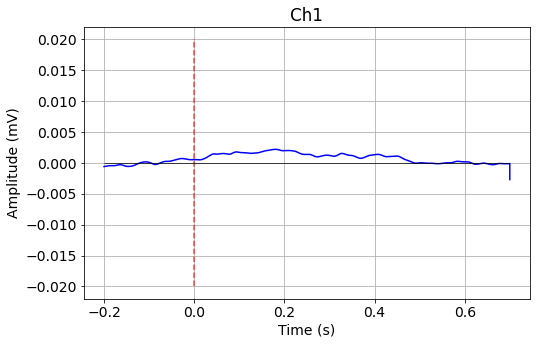

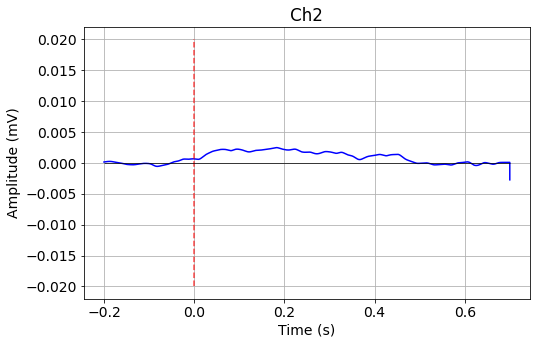

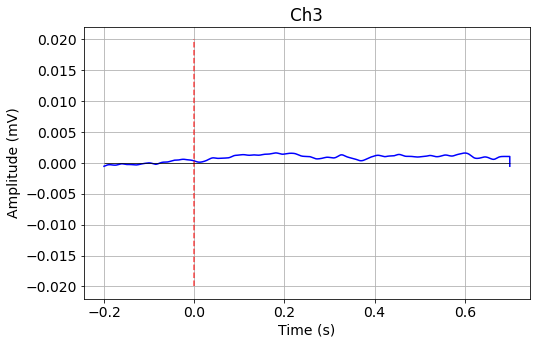

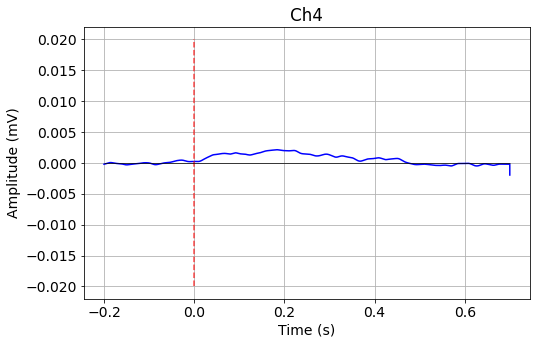

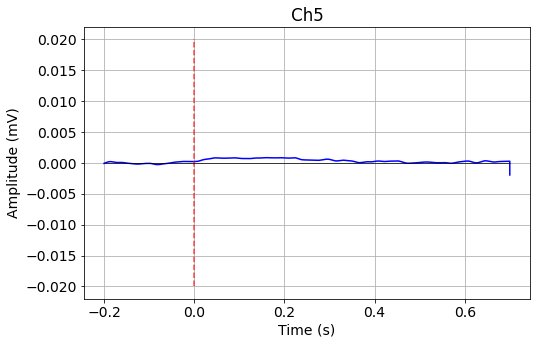

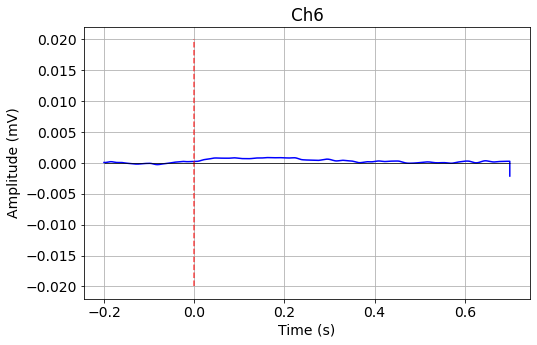

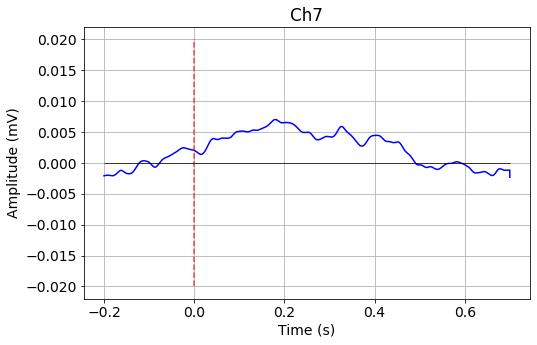

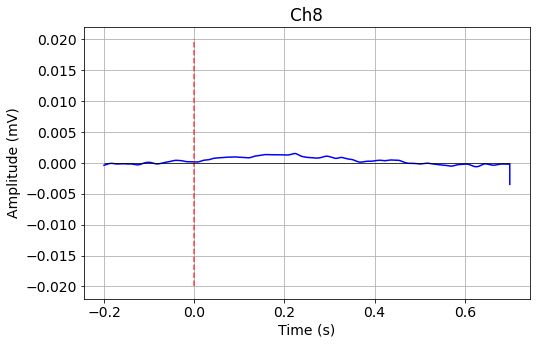

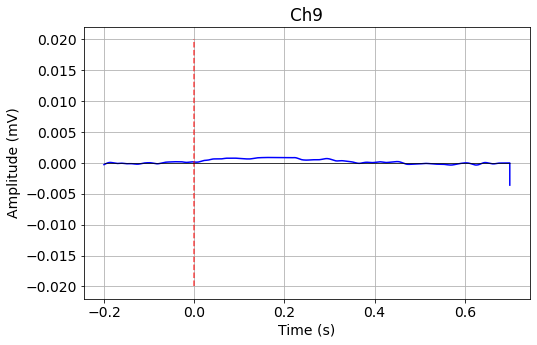

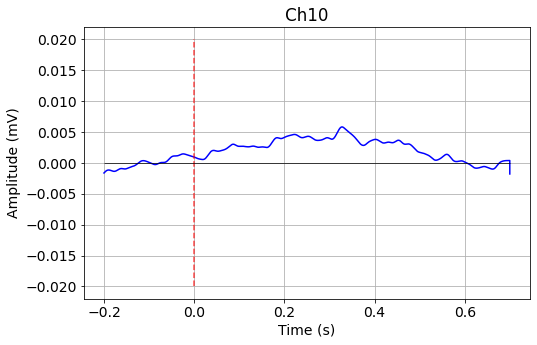

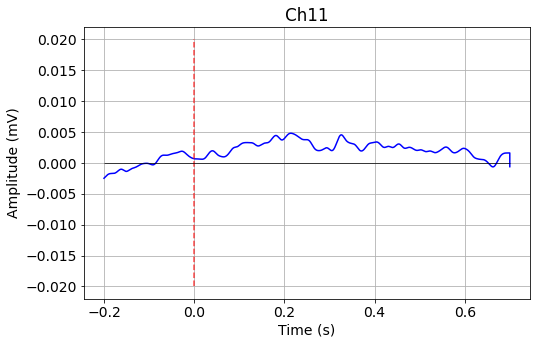

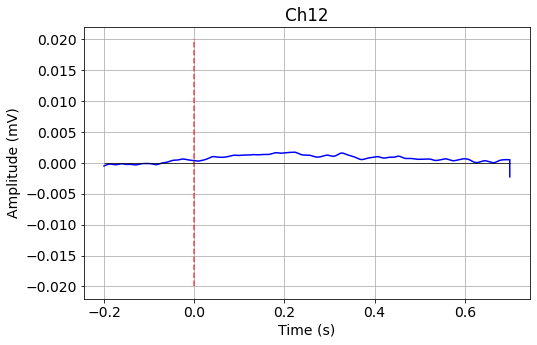

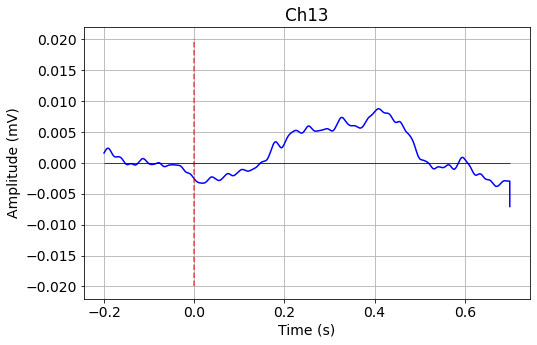

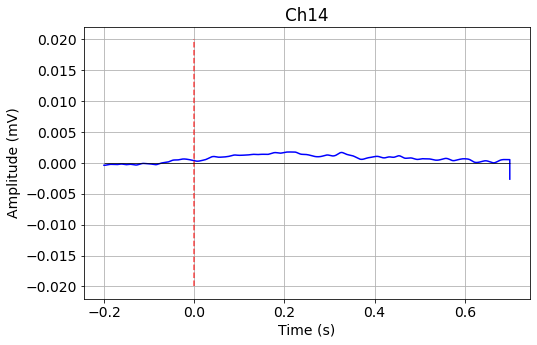

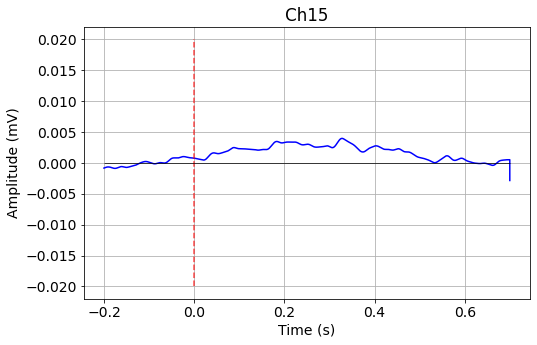

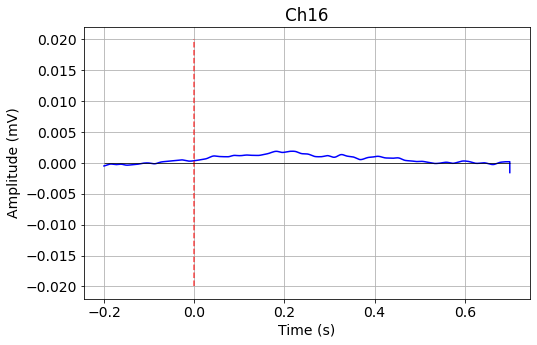

In [50]:
#mean残す用
mean_leave1 = [] #残す用
mean_leave2 = []
mean_leave3 = []
mean_leave4 = []
mean_leave5 = []
mean_leave6 = []
mean_leave7 = []
mean_leave8 = []
mean_leave9 = []
mean_leave10 = []
mean_leave11 = []
mean_leave12 = []
mean_leave13 = []
mean_leave14 = []
mean_leave15 = []
mean_leave16 = []

#1つずつ出力（平均後波形）-----------------------------------------------------------------------------------------------
for No in range(1, 17):
    fig = plt.figure(figsize=(8,5))
    plt.rcParams["font.size"] = 14
    plt.grid()
    ave4 = np.mean(globals()['ampsum_leave%s'%No],axis=0)
    new_ave4 = list(map(lambda G: G - globals()['ampsum_baseleave%s'%No][0], ave4))
    globals()['mean_leave%s'%No].extend(new_ave4)
    plt.plot(time, new_ave4, color='b')
    plt.title(f'{Ch}{No}')
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (mV)")
    plt.vlines(x=0, ymin=-0.02, ymax=0.02, color='r', alpha=.7, linestyles='dashed')
    plt.hlines(y=0, xmin=cut_left, xmax=cut_right, color='k', linewidth=0.7)
    plt.show()

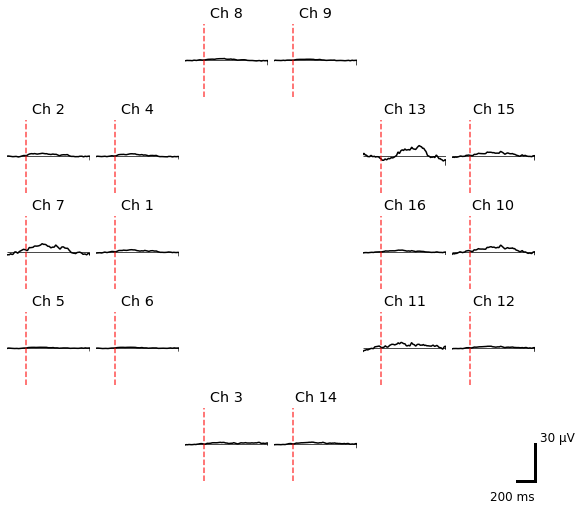

In [51]:
#電極の配置に並べ変える
#fig = plt.figure(figsize=(8,8), constrained_layout=True, facecolor='w')
fig = plt.figure(figsize=(8,8), constrained_layout=True, facecolor='w')
plt.rcParams["font.size"] = 12

ax1 = fig.add_subplot(6, 6, 9)
ax1.set_title("Ch 8")
ax1.plot(time, mean_leave8, color='k')

ax2 = fig.add_subplot(6, 6, 10)
ax2.set_title("Ch 9")
ax2.plot(time, mean_leave9, color='k')

ax3 = fig.add_subplot(6, 6, 13)
ax3.set_title("Ch 2")
ax3.plot(time, mean_leave2, color='k')

ax4 = fig.add_subplot(6, 6, 14)
ax4.set_title("Ch 4")
ax4.plot(time, mean_leave4, color='k')

ax5 = fig.add_subplot(6, 6, 17)
ax5.set_title("Ch 13")
ax5.plot(time, mean_leave13, color='k')

ax6 = fig.add_subplot(6, 6, 18)
ax6.set_title("Ch 15")
ax6.plot(time, mean_leave15, color='k')

ax7 = fig.add_subplot(6, 6, 19)
ax7.set_title("Ch 7")
ax7.plot(time, mean_leave7, color='k')

ax8 = fig.add_subplot(6, 6, 20)
ax8.set_title("Ch 1")
ax8.plot(time, mean_leave1, color='k')

ax9 = fig.add_subplot(6, 6, 23)
ax9.set_title("Ch 16")
ax9.plot(time, mean_leave16, color='k')

ax10 = fig.add_subplot(6, 6, 24)
ax10.set_title("Ch 10")
ax10.plot(time, mean_leave10, color='k')

ax11 = fig.add_subplot(6, 6, 25)
ax11.set_title("Ch 5")
ax11.plot(time, mean_leave5, color='k')

ax12 = fig.add_subplot(6, 6, 26)
ax12.set_title("Ch 6")
ax12.plot(time, mean_leave6, color='k')

ax13 = fig.add_subplot(6, 6, 29)
ax13.set_title("Ch 11")
ax13.plot(time, mean_leave11, color='k')

ax14 = fig.add_subplot(6, 6, 30)
ax14.set_title("Ch 12")
ax14.plot(time, mean_leave12, color='k')

ax15 = fig.add_subplot(6, 6, 33)
ax15.set_title("Ch 3")
ax15.plot(time, mean_leave3, color='k')

ax16 = fig.add_subplot(6, 6, 34)
ax16.set_title("Ch 14")
ax16.plot(time, mean_leave14, color='k')

for j in range(1, 17):
    globals()['ax%s'%j].spines['right'].set_visible(False)
    globals()['ax%s'%j].spines['top'].set_visible(False)
    globals()['ax%s'%j].spines['left'].set_visible(False)
    globals()['ax%s'%j].spines['bottom'].set_visible(False)
    globals()['ax%s'%j].set_xlim(cut_left, cut_right)
    globals()['ax%s'%j].set_ylim(-0.03, 0.03)
    globals()['ax%s'%j].hlines(y=0, xmin=cut_left, xmax=cut_right, color='k', linewidth=0.7)
    globals()['ax%s'%j].vlines(x=0, ymin=-0.03, ymax=0.03, color='r', alpha=.7, linestyles='dashed')
    globals()['ax%s'%j].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, bottom=False, left=False, right=False, top=False)


#ax19はスケールバーを疑似的に作成
ax19 = fig.add_subplot(6, 6, 36)
ax19.plot(time, mean_leave1, color="w")
ax19.spines['top'].set_visible(False)
ax19.spines['left'].set_visible(False)
ax19.set_xlim(cut_left, cut_right)
ax19.set_ylim(-0.03, 0.03)
ax19.set_xlabel('200 ms', loc='right', labelpad=10)#, fontweight='bold')
ax19.set_ylabel('30 µV', rotation='horizontal', labelpad=-105)#, fontweight='bold') #loc='bottom'
ax19.spines.right.set_bounds(-0.03, 0)
ax19.spines.bottom.set_bounds(cut_right-0.2, cut_right)
ax19.spines.right.set_linewidth(3)
ax19.spines.bottom.set_linewidth(3)
ax19.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, bottom=False, left=False, right=False, top=False)

#ラベルについて
#https://it-mayura.com/python/pm010/

pictname = 'fig3'
plt.savefig(root/pictname, bbox_inches="tight")
plt.show()

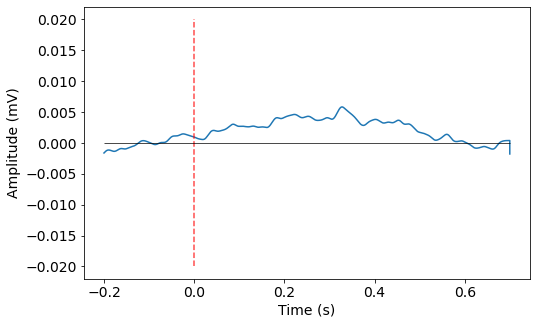

In [52]:
fig = plt.figure(figsize=(8,5))
plt.rcParams["font.size"] = 14
plt.plot(time, mean_leave10)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")
plt.vlines(x=0, ymin=-0.02, ymax=0.02, color='r', alpha=.7, linestyles='dashed')
plt.hlines(y=0, xmin=cut_left, xmax=cut_right, color='k', linewidth=0.7)
plt.show()

In [8]:
first = mean_leave10

In [17]:
second = mean_leave10

In [25]:
third = mean_leave10

In [33]:
four = mean_leave10

In [42]:
five = mean_leave10

In [53]:
zero = mean_leave10

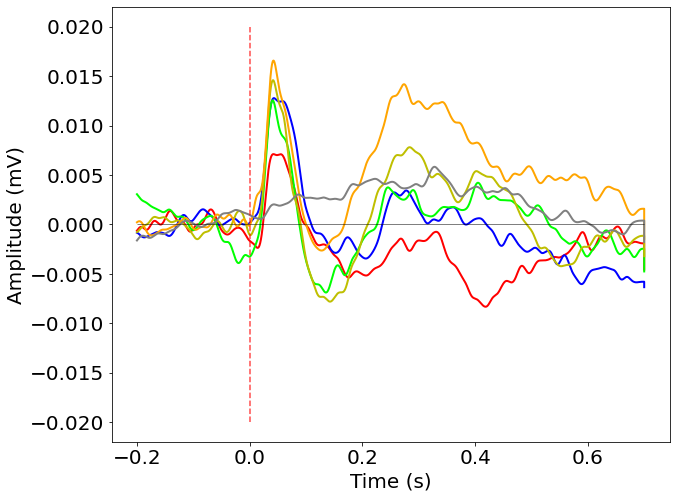

In [59]:
fig = plt.figure(figsize=(10,8))
plt.rcParams["font.size"] = 20
plt.plot(time, first, color='r', linewidth=2)
plt.plot(time, second, color='b', linewidth=2)
plt.plot(time, third, color='lime', linewidth=2)
plt.plot(time, four, color='y', linewidth=2)
plt.plot(time, five, color='orange', linewidth=2)
plt.plot(time, zero, color='gray', linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")
plt.vlines(x=0, ymin=-0.02, ymax=0.02, color='r', alpha=.7, linestyles='dashed')
plt.hlines(y=0, xmin=cut_left, xmax=cut_right, color='k', linewidth=0.5)
plt.show()

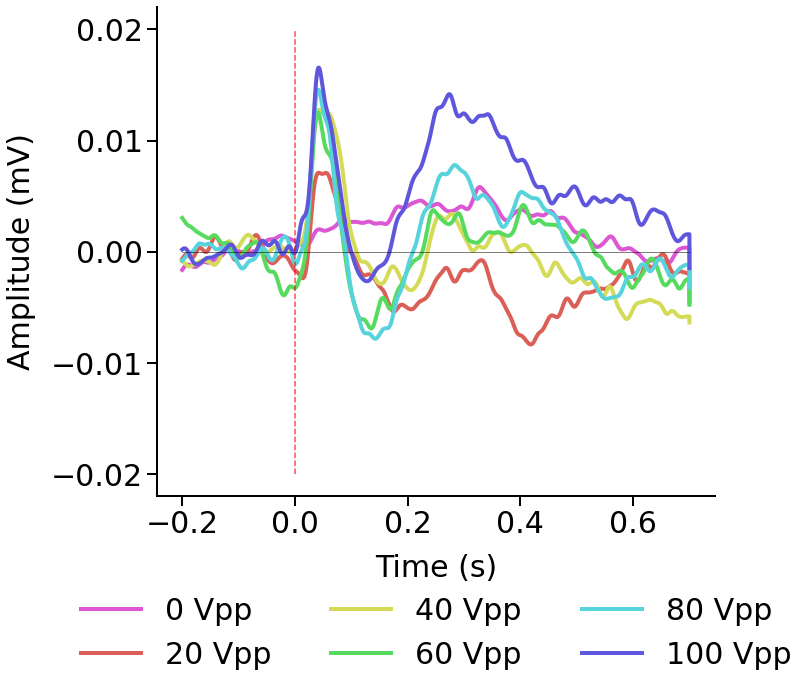

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# カラーパレットから色を選ぶ
colors = sns.color_palette("hls", 6)  # husl カラーパレットから6色のカラーを取得

fig = plt.figure(figsize=(10, 9))
plt.rcParams["font.size"] = 30
plt.tick_params(width=2, length=10)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# 各プロットにカラーを適用
plt.plot(time, zero, color=colors[5], linewidth=4, label='0 Vpp')
plt.plot(time, first, color=colors[0], linewidth=4, label='20 Vpp')
plt.plot(time, second, color=colors[1], linewidth=4, label='40 Vpp')
plt.plot(time, third, color=colors[2], linewidth=4, label='60 Vpp')
plt.plot(time, four, color=colors[3], linewidth=4, label='80 Vpp')
plt.plot(time, five, color=colors[4], linewidth=4, label='100 Vpp')


plt.xlabel("Time (s)", labelpad=15)
plt.ylabel("Amplitude (mV)", labelpad=15)
plt.vlines(x=0, ymin=-0.02, ymax=0.02, color='r', alpha=.7, linestyles='dashed')
plt.hlines(y=0, xmin=cut_left, xmax=cut_right, color='k', linewidth=0.5)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, frameon=False)  # 凡例を表示
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)  

plt.show()